# Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'keras'

Load the data, shuffled and split between train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Get the size of the sample train data

In [ ]:
x_train[0].shape

(28, 28)

Check the sample train data

In [ ]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [ ]:
y_train[333]

8

Check the actual image

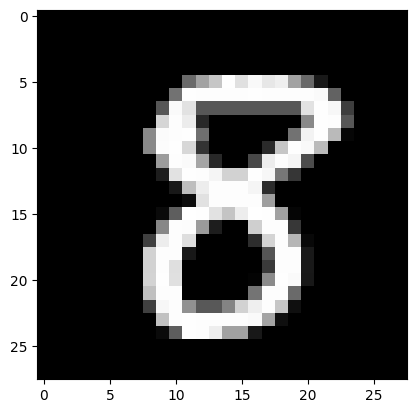

In [ ]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [ ]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [ ]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [ ]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [ ]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [ ]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 5s 8ms/step - loss: 0.5172 - accuracy: 0.8429 - val_loss: 0.2002 - val_accuracy: 0.9390
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2472 - accuracy: 0.9255 - val_loss: 0.1567 - val_accuracy: 0.9529
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1999 - accuracy: 0.9414 - val_loss: 0.1238 - val_accuracy: 0.9620
Epoch 4/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1754 - accuracy: 0.9490 - val_loss: 0.1161 - val_accuracy: 0.9651
Epoch 5/30
469/469 [==============================] - 4s 10ms/step - loss: 0.1565 - accuracy: 0.9542 - val_loss: 0.1110 - val_accuracy: 0.9675
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1438 - accuracy: 0.9574 - val_loss: 0.1033 - val_accuracy: 0.9686
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1325 - accuracy: 0.9600 - val_loss: 0.1002 - val_accuracy: 0.9707
Epoch

Use Keras evaluate function to evaluate performance on the test set

In [ ]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1018865630030632
Test accuracy: 0.9764000177383423


Interpret the result

> The results for the test set is outstanding, with an accuracy of 97.68% and a loss of less than 0.1. Meaning that the model can accurately and consistently predict data most of the time with very few errors.

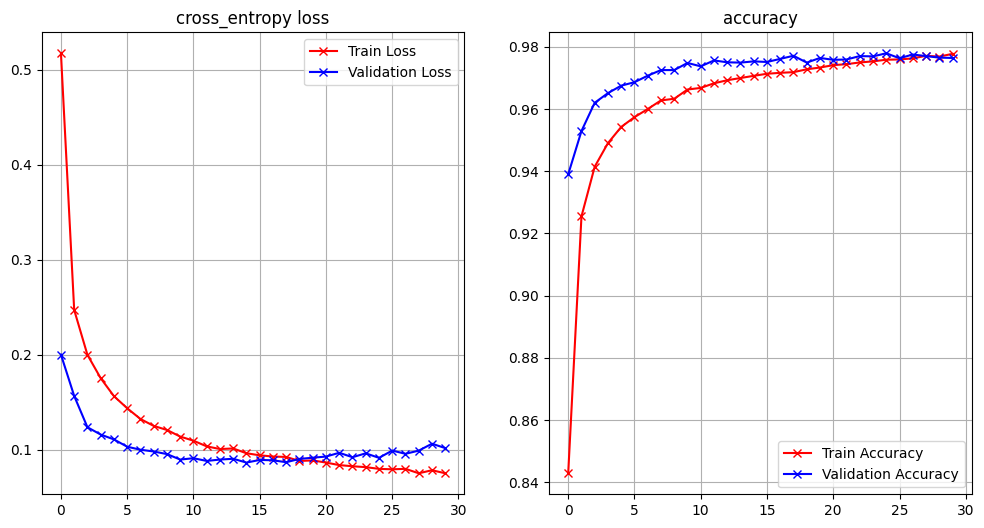

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

> The graph visualizes the learning curve of the model. We can observe that the model only initially had average performance, but after just one epoch the improvement was already drastic. And after around 5 epochs, the improvement for the accuracy and loss both started to really slow down.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [ ]:
# Two hidden layers.
# First hidden layer of size 400 and second of size 300
# Dropout of .4 at each layer

model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(784,))) # First hidden layer with size of 400
model_1.add(Dropout(0.4)) # Dropout of .4
model_1.add(Dense(300, activation='relu')) # Second hidden layer with size of 300
model_1.add(Dropout(0.4)) # Dropout of .4
model_1.add(Dense(10, activation='softmax'))

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               314000    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               120300    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* How many parameters does your model have? How does it compare with the previous model?
> The current model I built has an overall parameters of 437,310. This means that this model has more capacity to learn more patterns resulting in a more intricate model. However, the larger number of parameters also indicates larger size.

In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

epochs = 20
learning_rate = .001
batch_size = 128

model_1.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(lr=learning_rate),
                metrics=['accuracy'])

history_1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3353 - accuracy: 0.8977 - val_loss: 0.1353 - val_accuracy: 0.9572
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1525 - accuracy: 0.9547 - val_loss: 0.0933 - val_accuracy: 0.9724
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1198 - accuracy: 0.9637 - val_loss: 0.0886 - val_accuracy: 0.9751
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0992 - accuracy: 0.9705 - val_loss: 0.0739 - val_accuracy: 0.9785
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0900 - accuracy: 0.9728 - val_loss: 0.0759 - val_accuracy: 0.9783
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0804 - accuracy: 0.9762 - val_loss: 0.0708 - val_accuracy: 0.9798
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0746 - accuracy: 0.9766 - val_loss: 0.0698 - val_accuracy: 0.9805

In [ ]:
score_1 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

Test loss: 0.07878226786851883
Test accuracy: 0.9828000068664551


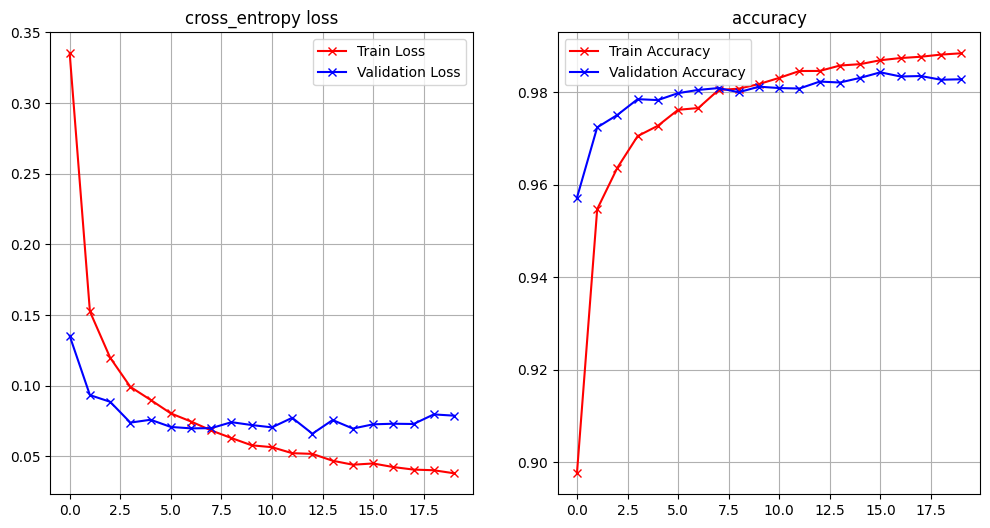

In [ ]:
plot_loss_accuracy(history_1)

In [ ]:
# Use at least two regularization techniques and apply it to the new model (model_2)
from keras.regularizers import l1, l2

# Create model_2 with regularization techniques:
## L2 Regularization
## Dropout
model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,), kernel_regularizer=l2(0.0001)))  # L2 regularization
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu', kernel_regularizer=l2(0.0001)))  # L2 regularization
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))

In [ ]:
# Train this model for your preferred epochs , learning rate, batch size and optimizer

epochs = [20, 30]
learning_rates = [.003, .001]
batch_sizes = [128, 256]

# Nested loop to test different parameters
history_list = []
for epoch in epochs:
  for lr in learning_rates:
    for batch_size in batch_sizes:
      model_2.compile(loss='categorical_crossentropy',
                      optimizer=RMSprop(lr=lr),
                      metrics=['accuracy'])

      history_2 = model_2.fit(
          x_train, y_train,
          batch_size=batch_size,
          epochs=epoch,
          verbose=1,
          validation_data=(x_test, y_test))

      # Store the training history in a list
      history_list.append({
          'epochs': epoch,
          'learning_rate': lr,
          'batch_size': batch_size,
          'history': history_2.history
      })

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.4202 - accuracy: 0.8979 - val_loss: 0.2087 - val_accuracy: 0.9611
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 0.2354 - accuracy: 0.9533 - val_loss: 0.1727 - val_accuracy: 0.9693
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1928 - accuracy: 0.9634 - val_loss: 0.1541 - val_accuracy: 0.9728
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1685 - accuracy: 0.9683 - val_loss: 0.1423 - val_accuracy: 0.9765
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1535 - accuracy: 0.9717 - val_loss: 0.1311 - val_accuracy: 0.9779
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1424 - accuracy: 0.9730 - val_loss: 0.1255 - val_accuracy: 0.9783
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1377 - accuracy: 0.9740 - val_loss: 0.1169 - val_accuracy: 0.9803

Epoch 1/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0978 - accuracy: 0.9823 - val_loss: 0.1030 - val_accuracy: 0.9832
Epoch 2/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0931 - accuracy: 0.9840 - val_loss: 0.1043 - val_accuracy: 0.9821
Epoch 3/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0921 - accuracy: 0.9840 - val_loss: 0.1002 - val_accuracy: 0.9838
Epoch 4/20
235/235 [==============================] - 5s 22ms/step - loss: 0.0893 - accuracy: 0.9849 - val_loss: 0.1058 - val_accuracy: 0.9820
Epoch 5/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0891 - accuracy: 0.9850 - val_loss: 0.0993 - val_accuracy: 0.9834
Epoch 6/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0877 - accuracy: 0.9851 - val_loss: 0.0977 - val_accuracy: 0.9847
Epoch 7/20
235/235 [==============================] - 6s 25ms/step - loss: 0.0854 - accuracy: 0.9854 - val_loss: 0.1070 - val_accuracy: 0.9819

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0956 - accuracy: 0.9827 - val_loss: 0.1085 - val_accuracy: 0.9811
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0961 - accuracy: 0.9820 - val_loss: 0.1101 - val_accuracy: 0.9817
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0980 - accuracy: 0.9819 - val_loss: 0.1110 - val_accuracy: 0.9823
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1018 - accuracy: 0.9809 - val_loss: 0.1103 - val_accuracy: 0.9817
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0986 - accuracy: 0.9821 - val_loss: 0.1133 - val_accuracy: 0.9817
Epoch 6/20
469/469 [==============================] - 6s 14ms/step - loss: 0.1001 - accuracy: 0.9816 - val_loss: 0.1104 - val_accuracy: 0.9820
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1019 - accuracy: 0.9812 - val_loss: 0.1107 - val_accuracy: 0.9823

Epoch 1/20
235/235 [==============================] - 7s 26ms/step - loss: 0.0946 - accuracy: 0.9844 - val_loss: 0.1074 - val_accuracy: 0.9827
Epoch 2/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0918 - accuracy: 0.9849 - val_loss: 0.1044 - val_accuracy: 0.9840
Epoch 3/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0885 - accuracy: 0.9851 - val_loss: 0.1028 - val_accuracy: 0.9846
Epoch 4/20
235/235 [==============================] - 5s 22ms/step - loss: 0.0883 - accuracy: 0.9853 - val_loss: 0.1054 - val_accuracy: 0.9835
Epoch 5/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0879 - accuracy: 0.9860 - val_loss: 0.1042 - val_accuracy: 0.9842
Epoch 6/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0867 - accuracy: 0.9865 - val_loss: 0.1129 - val_accuracy: 0.9825
Epoch 7/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0852 - accuracy: 0.9862 - val_loss: 0.1153 - val_accuracy: 0.9825

Epoch 1/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0925 - accuracy: 0.9843 - val_loss: 0.1101 - val_accuracy: 0.9819
Epoch 2/30
469/469 [==============================] - 7s 14ms/step - loss: 0.0959 - accuracy: 0.9834 - val_loss: 0.1400 - val_accuracy: 0.9759
Epoch 3/30
469/469 [==============================] - 6s 12ms/step - loss: 0.1009 - accuracy: 0.9824 - val_loss: 0.1189 - val_accuracy: 0.9819
Epoch 4/30
469/469 [==============================] - 7s 15ms/step - loss: 0.1036 - accuracy: 0.9822 - val_loss: 0.1080 - val_accuracy: 0.9837
Epoch 5/30
469/469 [==============================] - 6s 12ms/step - loss: 0.1036 - accuracy: 0.9821 - val_loss: 0.1155 - val_accuracy: 0.9813
Epoch 6/30
469/469 [==============================] - 7s 14ms/step - loss: 0.1030 - accuracy: 0.9823 - val_loss: 0.1118 - val_accuracy: 0.9830
Epoch 7/30
469/469 [==============================] - 6s 12ms/step - loss: 0.1023 - accuracy: 0.9829 - val_loss: 0.1199 - val_accuracy: 0.9814

Epoch 1/30
235/235 [==============================] - 5s 19ms/step - loss: 0.0988 - accuracy: 0.9841 - val_loss: 0.1131 - val_accuracy: 0.9820
Epoch 2/30
235/235 [==============================] - 4s 18ms/step - loss: 0.0950 - accuracy: 0.9847 - val_loss: 0.1125 - val_accuracy: 0.9832
Epoch 3/30
235/235 [==============================] - 5s 23ms/step - loss: 0.0920 - accuracy: 0.9854 - val_loss: 0.1209 - val_accuracy: 0.9827
Epoch 4/30
235/235 [==============================] - 4s 19ms/step - loss: 0.0910 - accuracy: 0.9865 - val_loss: 0.1124 - val_accuracy: 0.9846
Epoch 5/30
235/235 [==============================] - 5s 22ms/step - loss: 0.0905 - accuracy: 0.9861 - val_loss: 0.1130 - val_accuracy: 0.9829
Epoch 6/30
235/235 [==============================] - 5s 20ms/step - loss: 0.0885 - accuracy: 0.9865 - val_loss: 0.1177 - val_accuracy: 0.9844
Epoch 7/30
235/235 [==============================] - 4s 19ms/step - loss: 0.0912 - accuracy: 0.9863 - val_loss: 0.1170 - val_accuracy: 0.9836

Epoch 1/30
469/469 [==============================] - 8s 16ms/step - loss: 0.0961 - accuracy: 0.9839 - val_loss: 0.1097 - val_accuracy: 0.9834
Epoch 2/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0985 - accuracy: 0.9839 - val_loss: 0.1138 - val_accuracy: 0.9831
Epoch 3/30
469/469 [==============================] - 7s 15ms/step - loss: 0.0998 - accuracy: 0.9826 - val_loss: 0.1086 - val_accuracy: 0.9840
Epoch 4/30
469/469 [==============================] - 6s 12ms/step - loss: 0.1027 - accuracy: 0.9825 - val_loss: 0.1266 - val_accuracy: 0.9811
Epoch 5/30
469/469 [==============================] - 7s 15ms/step - loss: 0.1041 - accuracy: 0.9817 - val_loss: 0.1095 - val_accuracy: 0.9841
Epoch 6/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1055 - accuracy: 0.9825 - val_loss: 0.1178 - val_accuracy: 0.9825
Epoch 7/30
469/469 [==============================] - 7s 15ms/step - loss: 0.1059 - accuracy: 0.9821 - val_loss: 0.1182 - val_accuracy: 0.9834

Epoch 1/30
235/235 [==============================] - 6s 24ms/step - loss: 0.1007 - accuracy: 0.9844 - val_loss: 0.1158 - val_accuracy: 0.9839
Epoch 2/30
235/235 [==============================] - 4s 19ms/step - loss: 0.0963 - accuracy: 0.9854 - val_loss: 0.1112 - val_accuracy: 0.9841
Epoch 3/30
235/235 [==============================] - 4s 19ms/step - loss: 0.0943 - accuracy: 0.9852 - val_loss: 0.1189 - val_accuracy: 0.9843
Epoch 4/30
235/235 [==============================] - 5s 23ms/step - loss: 0.0931 - accuracy: 0.9859 - val_loss: 0.1109 - val_accuracy: 0.9832
Epoch 5/30
235/235 [==============================] - 4s 19ms/step - loss: 0.0921 - accuracy: 0.9856 - val_loss: 0.1120 - val_accuracy: 0.9847
Epoch 6/30
235/235 [==============================] - 5s 21ms/step - loss: 0.0912 - accuracy: 0.9863 - val_loss: 0.1217 - val_accuracy: 0.9820
Epoch 7/30
235/235 [==============================] - 5s 21ms/step - loss: 0.0894 - accuracy: 0.9869 - val_loss: 0.1147 - val_accuracy: 0.9851

In [ ]:
# Compare the accuracy and loss (training and validation) of model_1 and model_2

# Get the best performing model_2
best_model_2 = max(history_list, key=lambda x: max(x['history']['val_accuracy'])) # Highest validation accuracy

# Display results for model_1
print("Results for model_1:")
print("Train Accuracy:", max(history_1.history['accuracy']))
print("Validation Accuracy:", max(history_1.history['val_accuracy']))
print("Train Loss:", min(history_1.history['loss']))
print("Validation Loss:", min(history_1.history['val_loss']))

# Display results for the best model_2
print("\nResults for Best model_2:")
print("Epochs:", best_model_2['epochs'])
print("Learning Rate:", best_model_2['learning_rate'])
print("Batch Size:", best_model_2['batch_size'])
print("Train Accuracy:", max(best_model_2['history']['accuracy']))
print("Validation Accuracy:", max(best_model_2['history']['val_accuracy']))
print("Train Loss:", min(best_model_2['history']['loss']))
print("Validation Loss:", min(best_model_2['history']['val_loss']))

Results for model_1:
Train Accuracy: 0.9884166717529297
Validation Accuracy: 0.9843000173568726
Train Loss: 0.03800508379936218
Validation Loss: 0.06600756198167801

Results for Best model_2:
Epochs: 30
Learning Rate: 0.003
Batch Size: 256
Train Accuracy: 0.9878000020980835
Validation Accuracy: 0.9860000014305115
Train Loss: 0.08267301321029663
Validation Loss: 0.09780197590589523


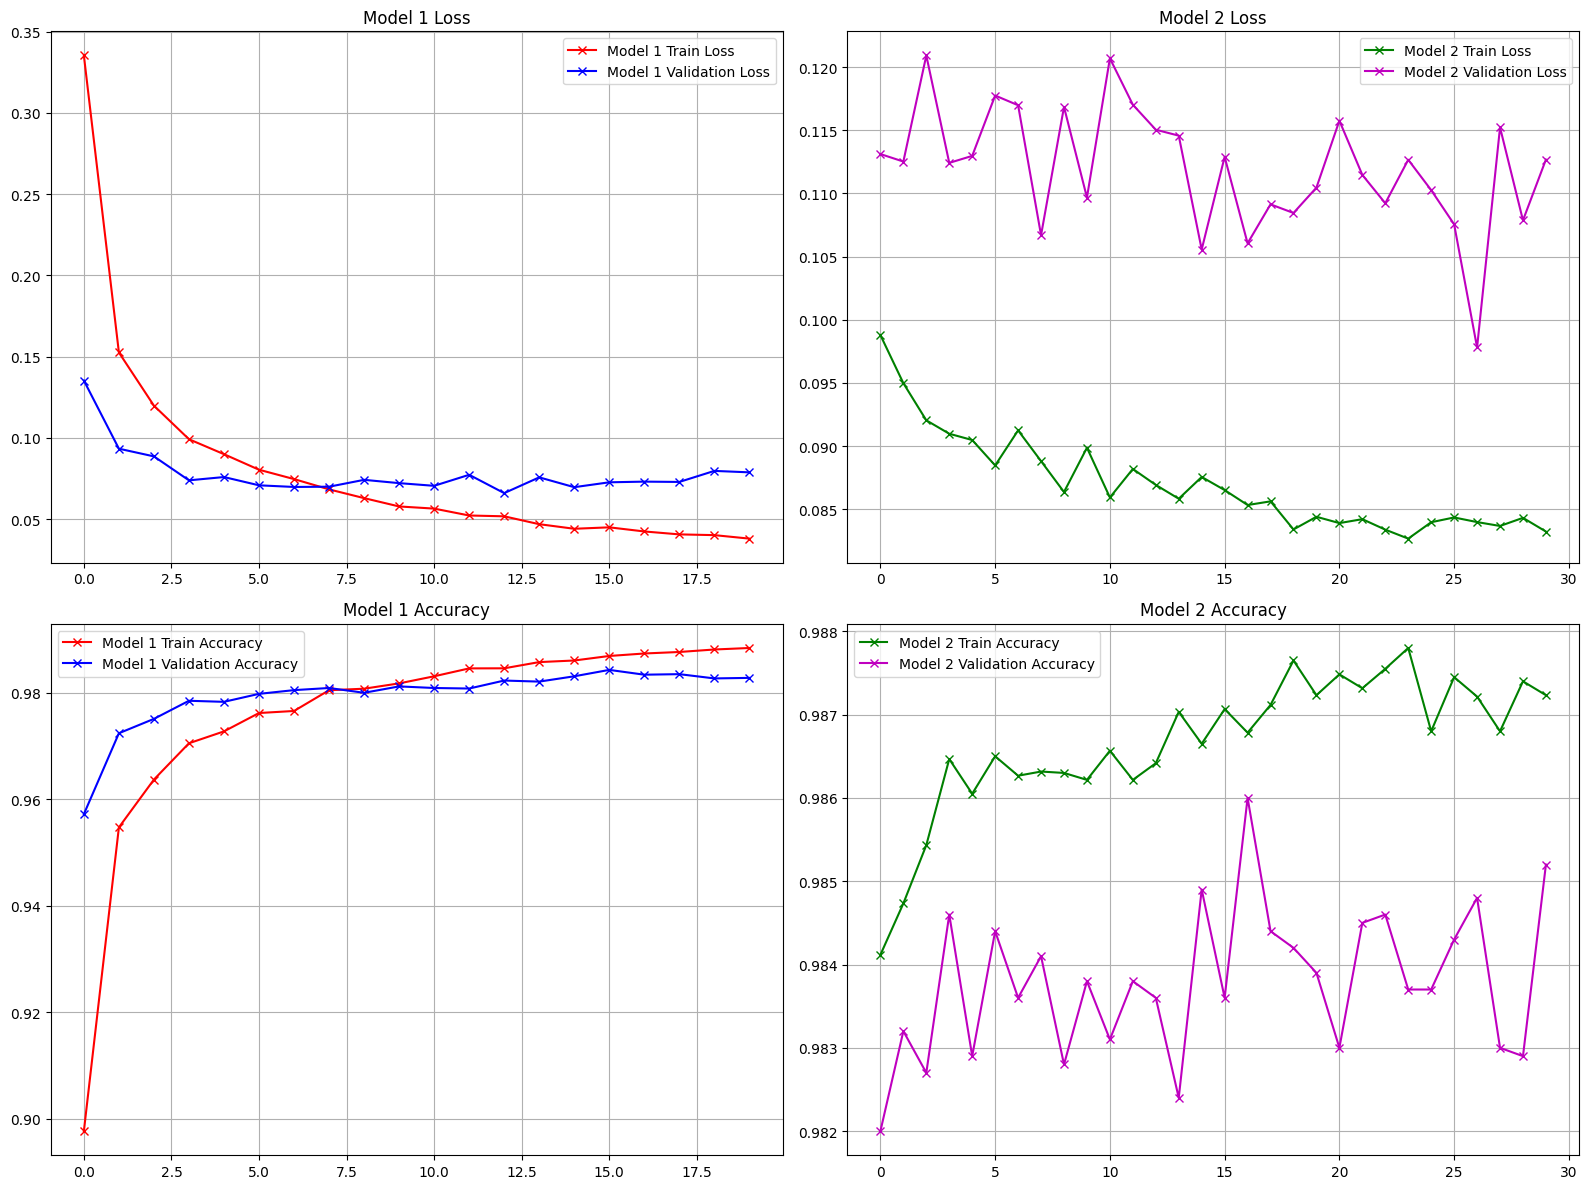

In [ ]:
# Plotting for loss and accuracy
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot Model 1 Loss
axes[0, 0].plot(history_1.history["loss"], 'r-x', label="Model 1 Train Loss")
axes[0, 0].plot(history_1.history["val_loss"], 'b-x', label="Model 1 Validation Loss")
axes[0, 0].legend()
axes[0, 0].set_title('Model 1 Loss')
axes[0, 0].grid(True)

# Plot Model 2 Loss
axes[0, 1].plot(best_model_2['history']["loss"], 'g-x', label="Model 2 Train Loss")
axes[0, 1].plot(best_model_2['history']["val_loss"], 'm-x', label="Model 2 Validation Loss")
axes[0, 1].legend()
axes[0, 1].set_title('Model 2 Loss')
axes[0, 1].grid(True)

# Plot Model 1 Accuracy
axes[1, 0].plot(history_1.history["accuracy"], 'r-x', label="Model 1 Train Accuracy")
axes[1, 0].plot(history_1.history["val_accuracy"], 'b-x', label="Model 1 Validation Accuracy")
axes[1, 0].legend()
axes[1, 0].set_title('Model 1 Accuracy')
axes[1, 0].grid(True)

# Plot Model 2 Accuracy
axes[1, 1].plot(best_model_2['history']["accuracy"], 'g-x', label="Model 2 Train Accuracy")
axes[1, 1].plot(best_model_2['history']["val_accuracy"], 'm-x', label="Model 2 Validation Accuracy")
axes[1, 1].legend()
axes[1, 1].set_title('Model 2 Accuracy')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

#### Conclusion

> In the supplementary activity, I combined dropout, the regularization used in the procedure, with my existing knowledge about L2 regularization to fine-tune neural network models using the MNIST dataset. I decided to create a triple nested loop to explore different combinations of epochs, learning rates, and batch sizes to train a total of eight models. Despite the meticulous process and the identification of the best-performing model with the highest validation accuracy, the learning curves exhibited unexpected fluctuations. This behavior suggests the intricate balance needed in adjusting hyperparameters to achieve stability and optimal convergence.